Lasso regression

In [12]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [13]:
# Setting seed to get the same data every time
np.random.seed(1016)

In [14]:
def rugnes(x):
    return 1 / (1 + 25*x**2)

In [15]:
# Setting up the data
n = 50
x = np.linspace(-1, 1, n)
y = rugnes(x)



In [16]:
def GD_lasso(X, y, lmbda=0.01, eta=0.01, n_iterations=1000, tolerance=1e-6):

    # Extract number of datapoints and number of parameters from the design matrix
    n, p = X.shape

    # Selecting a random theta to begin the gradient decent
    theta = np.random.randn(p,1)
    prev_theta = theta.copy()

    for i in range(n_iterations):

        # Compute gradient
        gradient = (-(2/n) * X.T @ (y - X @ theta)) + (lmbda * np.sign(theta))

        # Update theta
        theta -= eta * gradient

        # Check for convergance
        if (np.linalg.norm(prev_theta - theta)) < tolerance:
            break

        # Copy theta to previous_theta
        prev_theta = theta.copy()

    # Return optimal theta
    return theta

In [17]:
def GDM_Lasso(X, y, lmbda=0.01, alpha=0.9, eta=0.01, n_iterations=1000, tolerance=1e-6):

    # Initial velocity
    v = 0

    # Extract number of datapoints and number of parameters from the design matrix
    n, p = X.shape
    # Selecting a random theta to begin the gradient decent
    theta = np.random.randn(p,1)
    prev_theta = theta.copy()

    for i in range(n_iterations):

        # Compute gradient
        gradient = (-(2/n) * X.T @ (y - X @ theta)) + (lmbda * np.sign(theta))

        # Update velocity
        v = alpha * v - eta * gradient

        # Update theta
        theta += v

        # Check for convergance
        if (np.linalg.norm(prev_theta - theta)) < tolerance:
            print(f"GDM0 converged in {i} iterations")
            break

        # Copy theta to previous_theta
        prev_theta = theta.copy()

    # Return optimal theta
    return theta

In [18]:
def Lasso_reg(x, y, degree, eta=0.01, GD=None, lmbda=0.01, n_iter=1000, test_size=0.3):

    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    # Setting up the design matrix
    poly_features = PolynomialFeatures(degree)
    X = poly_features.fit_transform(x)

    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=10)

    # Scale features
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)

    # Center y
    y_offset = np.mean(y_train)
    y_train_c = y_train - y_offset

    # Compute theta based on selected GD method
    if GD == "GDM":
        theta = GDM_Lasso(X_train_s, y_train_c, lmbda=lmbda, alpha=0.9, eta=eta, n_iterations=n_iter, tolerance=1e-6)
    else:
        theta = GD_lasso(X_train_s, y_train_c, lmbda=lmbda, eta=eta, n_iterations=n_iter, tolerance=1e-6)

    # Making predictions
    y_train_pred = X_train_s @ theta + y_offset
    y_test_pred = X_test_s @ theta + y_offset

    # Results
    results = {
        "train_mse": mean_squared_error(y_train, y_train_pred),
        "test_mse": mean_squared_error(y_test, y_test_pred),
        "train_r2": r2_score(y_train, y_train_pred),
        "test_r2": r2_score(y_test, y_test_pred),
        "theta": theta
    }

    return results

In [19]:
from OLS_Ridge import plot_mse_r2_Lasso, generate_data

In [22]:
degrees = list(range(2, 16))
n = 50

# Generate data
x, y = generate_data(n, seed=44)

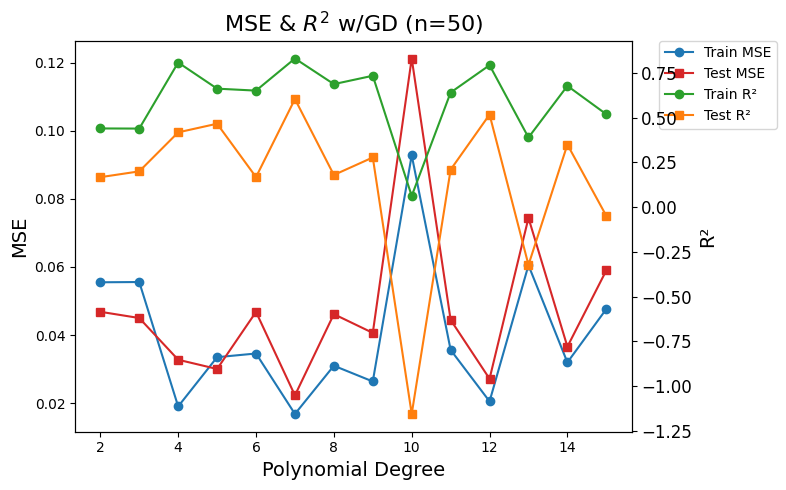

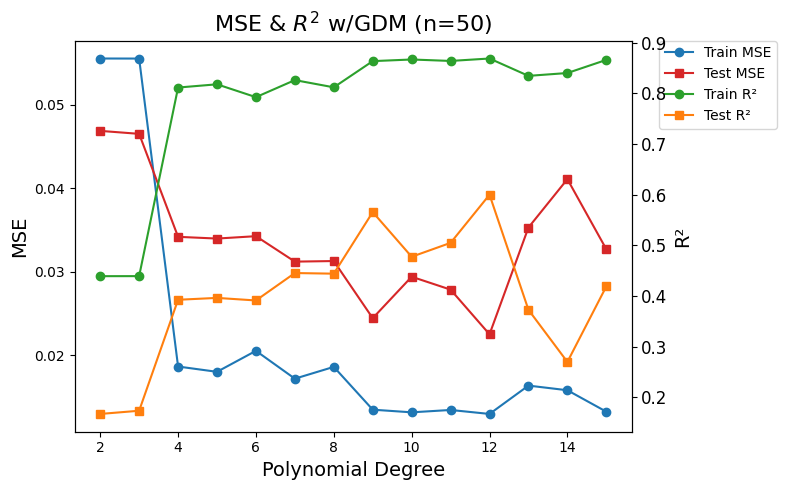

In [25]:
#Running experiments for our plotting
def run_experiments_Lasso(x, y, degrees, lmbda = 0.001, test_size=0.3, eta = 0.01, GD=None, n_iter = 1000, momentum = False):
    # Empty list of results
    results = []
    for d in degrees:
        res = Lasso_reg(x, y, d, eta=eta, lmbda=lmbda, test_size=test_size, GD=GD, n_iter=n_iter)
        res["degree"] = d
        results.append(res)
    return results

# Normal GD
res = run_experiments_Lasso(x, y, degrees)
plot_mse_r2_Lasso(res, n, GD="GD", R2=True)

# GDM
res = run_experiments_Lasso(x, y, degrees, GD="GDM")
plot_mse_r2_Lasso(res, n, GD="GDM", R2=True)